# 第1章 统计学习方法概论(参照资料自己敲一遍代码)

* 统计学习包括监督学习、非监督学习、半监督学习和强化学习
* 统计学习方法三要素——模型、策略、算法，对理解统计学习方法起到提纲挈领的作用
* 本书主要讨论监督学习，监督学习可以概括如下：从给定有限的训练数据出发， 假设数据是独立同分布的，而且假设模型属于某个假设空间，应用某一评价准则，从假设空间中选取一个最优的模型，使它对已给训练数据及未知测试数据在给定评价标准意义下有最准确的预测
* 统计学习中，进行模型选择或者说提高学习的泛化能力是一个重要问题。如果只考虑减少训练误差，就可能产生过拟合现象。模型选择的方法有正则化与交叉验证。学习方法泛化能力的分析是统计学习理论研究的重要课题
* 分类问题、标注问题和回归问题都是监督学习的重要问题

# 例1.1 $y=sin2\pi x$ 加上一个正态分布的噪音干扰，用多项式去拟合

In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 目标函数
def real_func(x):
    return np.sin(2 * np.pi * x)

# 多项式
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

* 上文中 np.poly1d([1, 2, 3]) 生成 $ 1x^2 + 2x^1 + 3x^0 $

In [4]:
# 生成点
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)
# 加上正态分布噪音的目标函数的值
y_ = real_func(x)
y = [np.random.normal(0, 0.1) + y1 for y1 in y_] # 加上均值为0， 方差为0.1的正态分布噪音

In [5]:
def fitting(M = 0): # M 多项式的次数
    # 随机初始化多项式参数
    p_init = np.random.rand(M + 1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args = (x, y)) # 误差函数，拟合函数参数， 数据点
    print('Fitting Parameters:', p_lsq[0])
    
    # 可视化
    plt.plot(x_points, real_func(x_points), label = 'real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label = 'fitted curve')
    plt.plot(x, y, 'bo', label = 'noise')
    plt.legend()
    return p_lsq

Fitting Parameters: [-0.03382394]


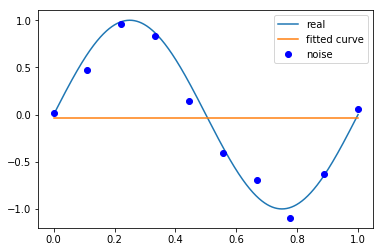

In [6]:
# M = 0
p_lsq_0 = fitting(M = 0)

Fitting Parameters: [-1.24086555  0.58660884]


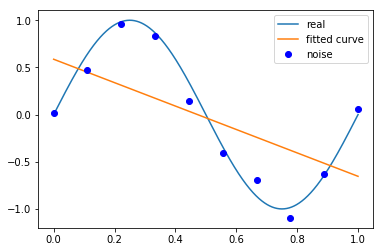

In [7]:
# M = 1
p_lsq_1 = fitting(M = 1)

Fitting Parameters: [ 20.23982894 -30.09626004  10.01486235  -0.07400498]


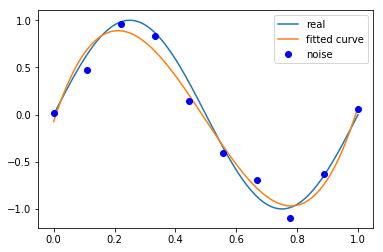

In [8]:
# M = 3
p_lsq_3 = fitting(M = 3)

Fitting Parameters: [-5.99558733e+03  2.22048308e+04 -3.27238461e+04  2.44120233e+04
 -9.80978580e+03  2.25176935e+03 -3.95582889e+02  5.53813603e+01
  8.36329064e-01  1.75854279e-02]


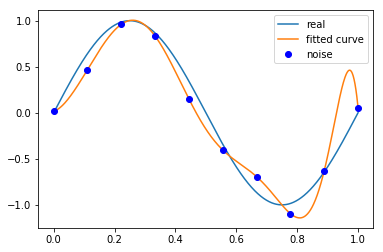

In [9]:
# M = 9
p_lsq_9 = fitting(M = 9)

## 正则化

上面的结果显示过拟合，引入正则化项(regularizer), 降低过拟合

p-范数： $ \mid\mid x \mid\mid_p = (\mid x_1 \mid^p + ... + \mid x_n \mid^p)^(1/p) $

L1范数：向量中各元素绝对值和 

L2范数：向量中各元素平方和的平方根

### 最小二乘法，加正则化项

$ \sum_{i=0}^{n}{(h(x_i) - y_i)^2} + \lambda\mid\mid\omega\mid\mid^2 $

In [23]:
regularization = 0.0001

def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y # 拟合函数与实际值的差值
    ret = np.append(ret, np.sqrt(0.5 * regularization * np.square(p))) # 原GitHub项目此处可能有问题
    return ret

In [21]:
p_init = np.random.rand(9 + 1)
p_lsq_regulazation = leastsq(residuals_func_regularization, p_init, args = (x, y))
p_lsq_regulazation

(array([ -3.80184   ,  -1.93736284,   0.9835775 ,   4.70141441,
          7.47723129,   5.27643579,  -5.73380858, -14.13176958,
          7.24093902,  -0.01566294]), 1)

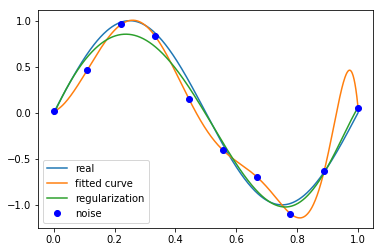

In [22]:
plt.plot(x_points, real_func(x_points), label = 'real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label = 'fitted curve')
plt.plot(x_points, fit_func(p_lsq_regulazation[0], x_points), label = 'regularization')
plt.plot(x, y, 'bo', label = 'noise')
plt.legend()